In [30]:
import pandas as pd
%matplotlib inline

In [31]:
a_df = pd.read_csv('data/anime.csv')
a_df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [32]:
a_df.shape

(12294, 7)

In [33]:
r_df = pd.read_csv('data/rating.csv')
r_df.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [34]:
r_df.shape

(7813737, 3)

<AxesSubplot:ylabel='Frequency'>

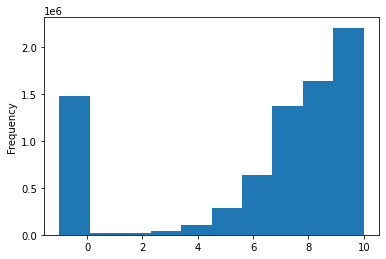

In [37]:
r_df['rating'].plot(kind='hist')